# 作業：用 Python 語言描述各種常見隨機分布
**繪出常見的隨機變數分佈如下**
1. 均勻分佈 Uniform Distribution (n=5000，20-60之間)

2. 常態分佈 Normal Distribution (N(2,2))

3. 指數分佈 Exponential Distribution (scale=2,loc=2,size=1500)

4. 布阿松分佈 Poisson Distribution (mu=4, size=5000)

5. 二項式分布 Binomial Distribution (嘗試 10000 次，成功率0.6)

6. 柏努力分布 Bernoulli Distribution (做 10000 個實驗，成功率 0.7)

我們先載入必要程式庫並做出始動作：並做初始動作：

In [2]:
import numpy as np
import pandas as pd
import math 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())
from scipy import stats
from scipy.stats import chi2_contingency #卡方檢定 & Crames'v
import statistics
from IPython.display import display  #在jupyter notebook 使用預覽畫面
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline
# 特徵選取會用到的函數
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

import pingouin as pg  # ANOVA 單因子及變數顯著性分析 (https://pingouin-stats.org/build/html/index.html)
import researchpy      #Cramér's V（克拉梅V係數）
plt.rcParams['font.family'] = 'Microsoft JhengHei' #顯示中文字(Windows)
#plt.rcParams['font.family'] = 'Heiti TC' #顯示中文字(Mac OS)


D:\Python3.9\AI數學馬拉松
1.5.1


In [7]:
# for inline plots in jupyter
%matplotlib inline

# import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [8, 4]
#plt.style.use(['seaborn-darkgrid'])

In [5]:
# import seaborn
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(8,4)})

## 1. 均勻分佈 Uniform Distribution

最簡單也很有用的連續型分佈 PDF 如下:


$$
\begin{equation}
  f(x) =
    \begin{cases}
      \frac{1}{b-a} & \text{for} \ a \leq x \leq b, \\
      0  & \text{for} \ x < a \ \text{or} \ x > b
    \end{cases}       
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. The following figure shows a uniform distribution in interval (a,b). Notice since the area needs to be $1$. The height is set to $1/(b-a)$.


![](graphics/figure1.png)

從 `scipy.stats` 下載 uniform module.


In [8]:
# import uniform distribution
from scipy.stats import uniform

`uniform` 經由`loc` 和 `scale` 參數產生一連續型均勻分佈變數. 平均分佈在`loc` 和 `loc + scale`之間. `size` 代表隨機變數的數目. `random_state` 確定產出一致.


In [25]:
# random numbers from uniform distribution
n = 5000
start = 20
width = 40
#data_uniform = ### 你的程式碼 ###
data_uniform =uniform.rvs(loc = start, scale = width, size=n,random_state = 42)

可以用 Seaborn’s `distplot` 繪出直方圖.

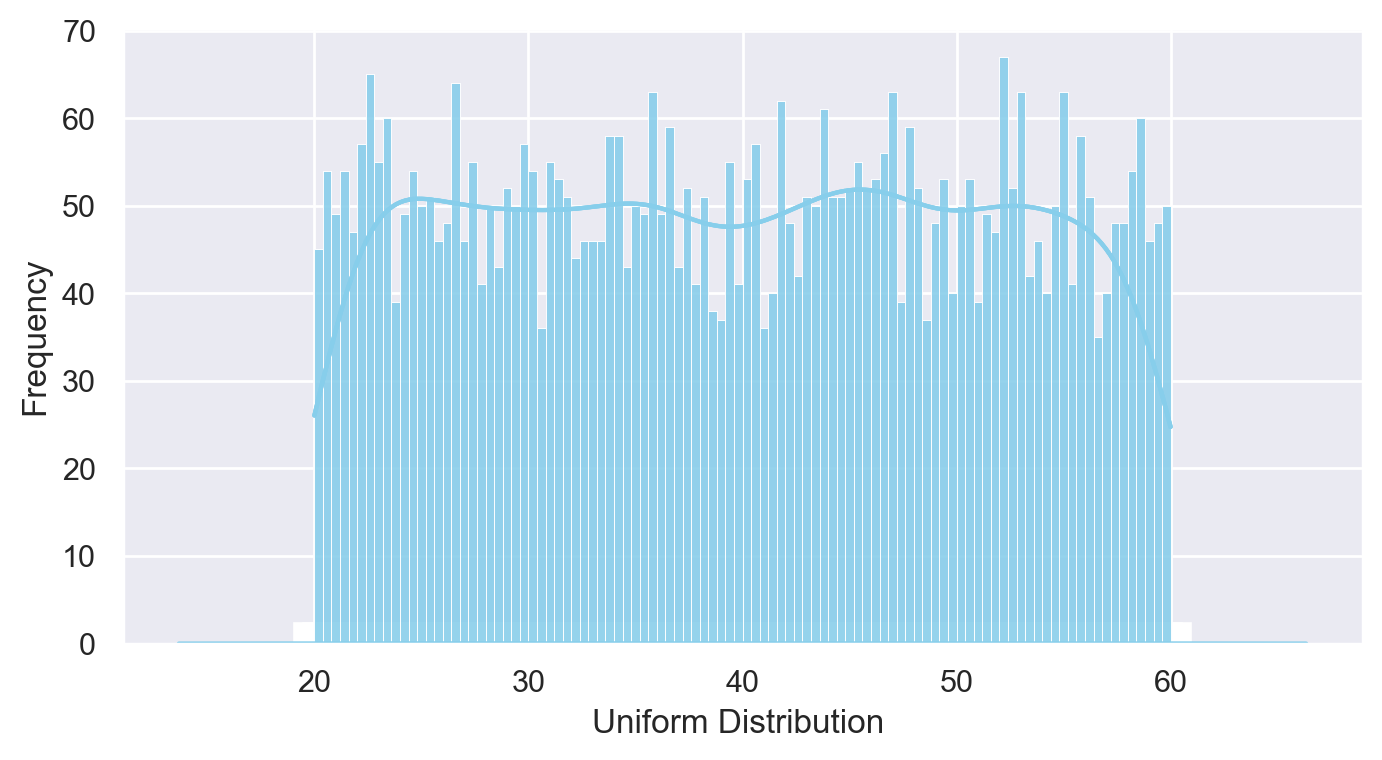

In [16]:
ax = sns.histplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  #hist_kws={"linewidth": 15,'alpha':1}
                 )

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

## 2. 常態分佈 Normal Distribution

常態分佈也較高斯分佈 Gaussian distribution, 在資料科學無所不在. 統計學上用的最廣統計學上用的最廣. 此分佈是許多數據演算法的假設此分佈是許多數據演算法的假設.

這是一個鐘形的木度分佈，平均值為 $μ$ 標準差 $σ$. 密度曲線乘對稱, 以平均值為中心. PDF( probability distribution function) 如下:


$$
f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


![](graphics/figure2.png)


In [133]:
def norm_dist(u,s,size = None):
    np.random.seed(42)
    if size is None:
        x = np.linspace(u-(4*s),u+(4*s),1000)
        y = (1/np.sqrt(2*np.pi*(s)**2))*(np.exp(-((x-u)/(2*s))**2))
        return x,y
    else:
        return np.random.normal( u, s, size)

In [134]:
#from scipy.stats import norm

# generate random numbers from N(2,2)
#data_normal = ### 你的程式碼 ###

data_normal = norm_dist(2,2,10000)

以seaborn distplot 繪出

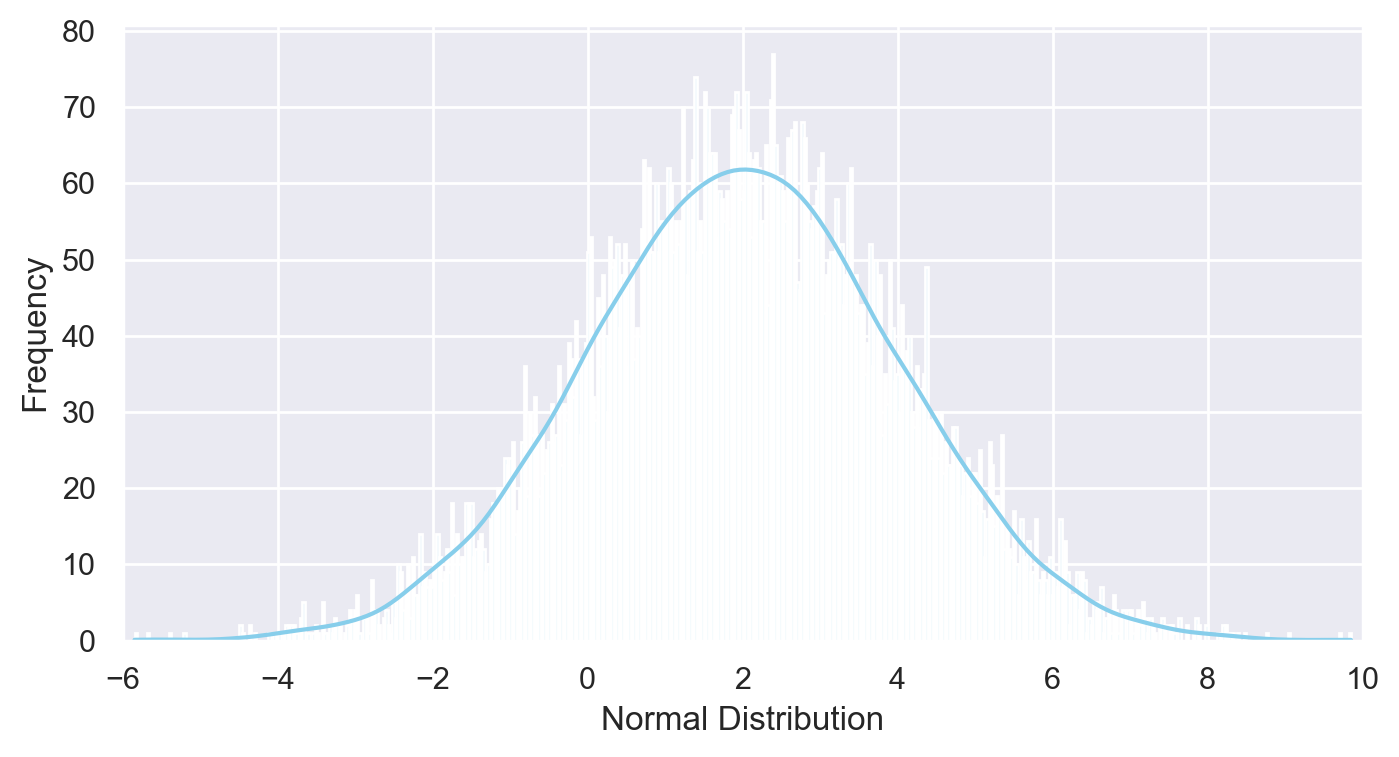

In [136]:
ax = sns.histplot(data_normal,
                  bins=500,
                  kde=True,
                  color='skyblue',
                  linewidth=1,
                  alpha = 0.7
                 )
#手動設定x範圍
plt.xlim(-6,10)
ax.set(xlabel = 'Normal Distribution', ylabel = 'Frequency')
plt.show()

## 3. 指數分佈 Exponential Distribution

指數分佈描述一個穩定獨立固定平均發生機率事件(Poisson point Process Event)間格的時間。 $λ$ 叫做比率參數, 等式如下 :


$$
f(x;\lambda)=
    \begin{cases}
        \lambda e^{-\lambda x} & x \geq 0, \\
        0 & x < 0
    \end{cases}
$$

使用 `scipy.stats` 模組的 `expon.rvs()` 方法產生。 形狀參數 `scale` 就是等式中的 `1/lambda`. `loc` 是用來移動分佈的位置, `size` 決定變化大小. 


In [ ]:
from scipy.stats import expon

data_expon = ### 你的程式碼 ###

我們以 seaborn 繪出:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

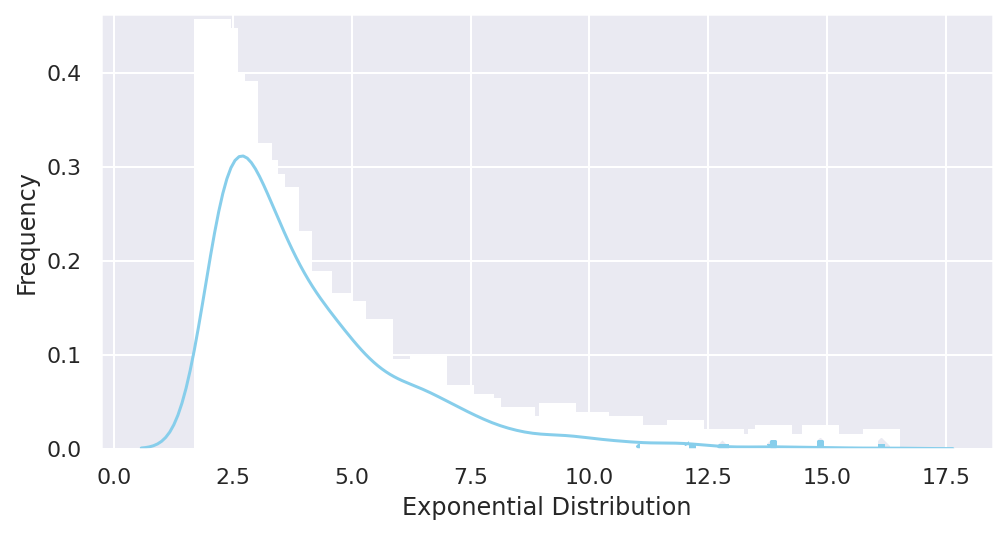

In [ ]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## 4. 卜瓦松分佈 Poisson Distribution

Poisson random variable 用來描述某段時間發生的次數. 比方一日內的網站訪問數. Poisson 分佈以事件發生率 rate ($μ$) 表達. 某段時間之事件發生數可以 0, 1, 2, … 表達表達，發生平均數發生平均數稱為 $λ$ (lambda). 在某段時間發生 $k$ 的機率是:


$$
P(k \ \text{events in interval}) = \frac{\lambda^k}{k!} e^{-\lambda} 
$$

卜瓦松分佈API


In [98]:
from scipy.stats import poisson

#data_poisson = ### 你的程式碼 ###

以seaborn繪圖如下


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

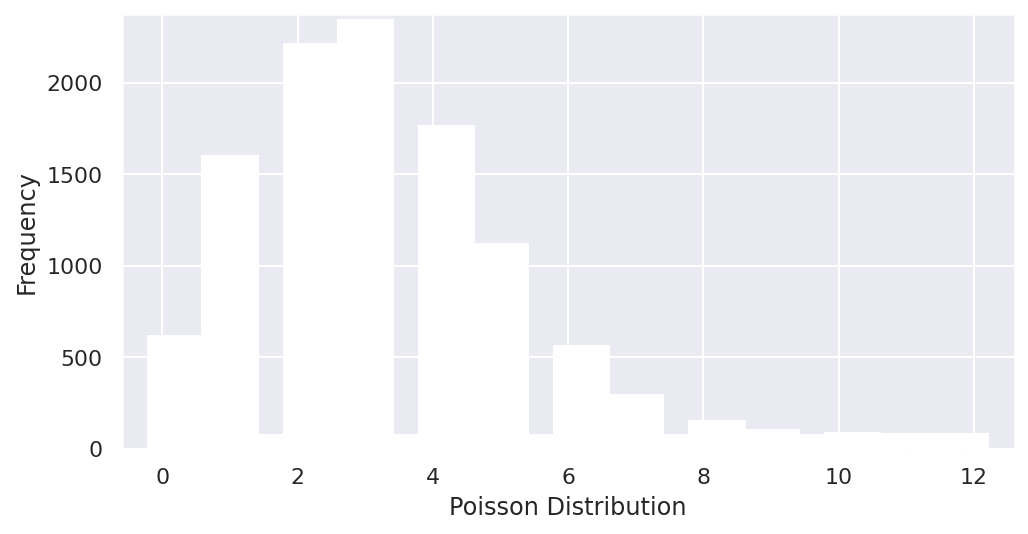

In [ ]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## 5. 二項式分布 Binomial Distribution

此分布此分布紙又兩種結果且成功機率固定. 每次結果式獨立，且成敗機率不必相等。參數是 $n$ 和 $p$。 $n$ 是嘗試次數, 而 $p$ 成功機率成功機率. PDF 為 :


$$f(k,n,p) = Pr(k; n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}$$

其中 :


$$
{n \choose k} = \frac{n!}{k!(n-k)!}
$$

二項式分佈的API


In [ ]:
from scipy.stats import binom

data_binom = ### 你的程式碼 ###

繪圖：


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

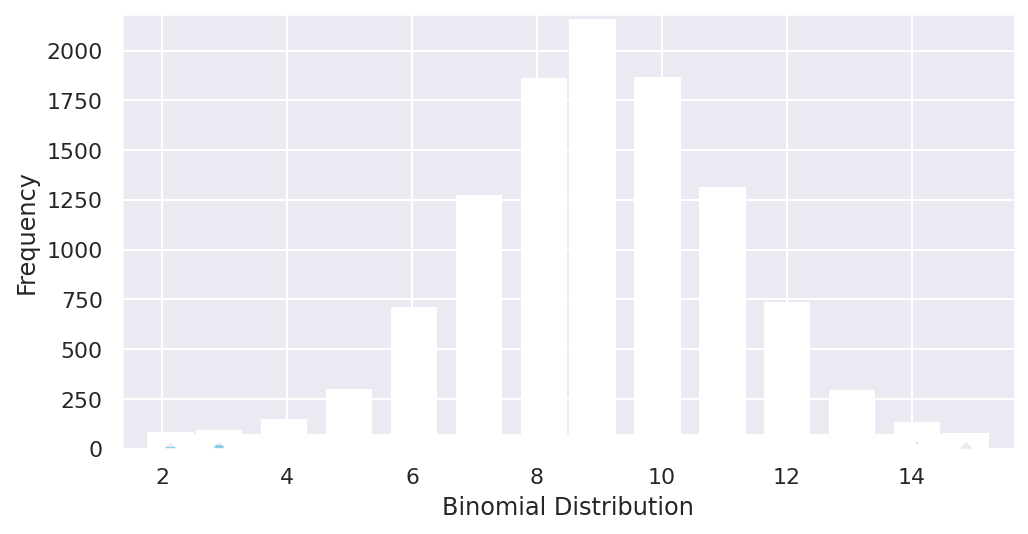

In [ ]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')



## 6. 柏努力分布 Bernoulli Distribution

柏努力分布只試一次，如丟銅板，只有兩個結果,  $1$ (success) 和 $0$ (failure) 它就是二項式分布只執行一次的分布。 PMF 如下:


$$
f(k;p) = p^k(1-p)^{1-k} \quad \text{for} \ k \in \{0,1\}
$$

柏努力分布API


In [ ]:
from scipy.stats import bernoulli

data_bern = ### 你的程式碼 ###

繪圖


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

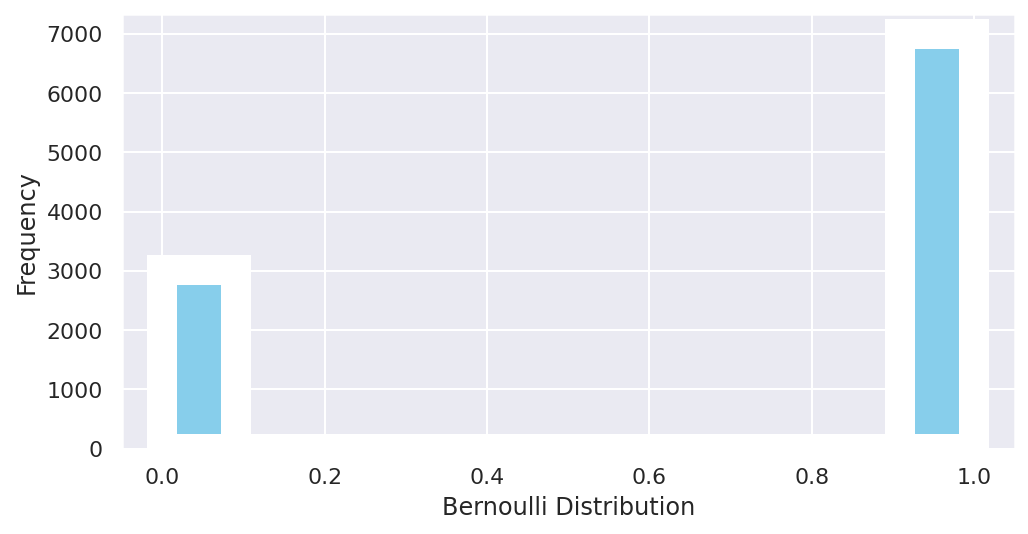

In [ ]:
ax = sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')